# Machine Learning Example Case: 
House Sale Price Prediction (like Zillow's "zestimate") 

When you see a line starting with "TASK", do that task!

### TASK: Click on the next cell and press shift-enter
You will get the code in it get executed.   
The result of last command or representation of last varible in that cell will be displayed 

In [46]:
import pandas as pd
housing = pd.read_csv('housing_processed.csv')
housing.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,0,0,0,0,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,0,0,0,0,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,0,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,0,0,0,0,0,0,0,0,0,1


### Filtering Columns
Some columns were not removed when equivalent coded ones were created

In [47]:
housing[["ExterQual","ExterQual_Coded"]].head()

,ExterQual,ExterQual_Coded
0,Gd,3
1,TA,2
2,Gd,3
3,TA,2
4,Gd,3


### Filtering in a series
dtypes returns a series   
filtering series and dataframes are similar

In [48]:
type(housing.dtypes==object)

pandas.core.series.Series

In [49]:
housing.dtypes[housing.dtypes==object]

ExterQual       object
ExterCond       object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
HeatingQC       object
CentralAir      object
KitchenQual     object
Functional      object
FireplaceQu     object
GarageFinish    object
GarageQual      object
GarageCond      object
PavedDrive      object
dtype: object

In [50]:
housing.dtypes[housing.dtypes==object].shape

(16,)

In [51]:
"SalePrice" in housing.columns 

True

### Removing Undesired Columns
In my case, my colleague had left above non-numeric columns in preprocessing, after creating corresponding coded versions

In [52]:
len(housing.columns)

238

In [53]:
# We could drop columns by name:
housing_ml = housing.drop(columns=["ExterQual"])

In [54]:
# or wholesale, keeping only numeric:
housing_ml = housing.loc[:,housing.dtypes != object]

In [55]:
len(housing_ml.columns)

222

# Separate Target into new Variable
- "SalePrice" is the target.    
 - The value we want to predict from other values (features) for a house.  
- Currently it is a column like the other features.   
- Scikit-learn needs 2 variables: features (X) and target (y) to be Predicted into its own 1-D array 

# NumPy
- Both Pandas and scikit-learn are build on top of NumPy
- scikit-learn can not directly work on dataframes
- X and y data type needs to be NumPy "ndarrays"

In [56]:
housing_ml.shape

(1460, 222)

In [57]:
# Split data as features and target
# take "SalePrice" values into its own 1-D array 
sale_price = housing_ml.pop('SalePrice')
type(sale_price)

pandas.core.series.Series

In [58]:
# pop removes the column
# "in place" operation
# now housing_ml has one less column
housing_ml.shape

(1460, 221)

In [59]:
y = sale_price.values
type(y)

numpy.ndarray

# See what other methods are available for ndarray

In [60]:
# press tab after putting cursor after dot "."
#y. #uncomment, press tab after . 

In [61]:
y.shape
# (1460,)
# it is equivalent to (1460)
# means it is a 1-d array

(1460,)

### TASK: get ndarray version of feature dataframe put it onto variable X

In [62]:
X = housing_ml.values

### TASK: check the shape of X

In [63]:
X.shape

(1460, 221)

### TASK: programmatically check if X and y has matching number of rows
You

In [64]:
X.shape[0] == y.shape[0]

True

# First Model
Q: What would you do if you had no features?

A: You would always estimatate the average house price.

We will have to do much better than that.  
We have so much data to base our decision on.   
It can still serve us as a baseline to compare.   
An inferior baseline could be: random in the range or max and min in training data. 

In [65]:
# Import estimator
from sklearn.dummy import DummyRegressor
# Instantiate estimator
# guess the mean every single time
mean_reg = DummyRegressor(strategy='mean')
# fit estimator
mean_reg.fit(X, y)

DummyRegressor()

In [66]:
# predict
mean_reg.predict(X)

array([180921.19589041, 180921.19589041, 180921.19589041, ...,
       180921.19589041, 180921.19589041, 180921.19589041])

## Evaluating The Model
scikit-learn regressors have a score function.   
It gives you how much better your model does compared to worst model
Technically: what percentage of the variance has decreased over the worst model

"Mean" *is* the worst model, so its score will be 0.

In [67]:
mean_reg.score(X, y)

0.0

## Fitting a linear model 
First, let's use only one feature 

In [68]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [69]:
X_lf = housing_ml[['LotFrontage']]

In [70]:
linear_model.fit(X_lf, y)

LinearRegression()

Above, you see that it used defaults to create the estimator.   
You could google "LinearRegression sklearn" and find the documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
to see the options for the other parameters.

In [71]:
y_pred = linear_model.predict(X_lf)

In [72]:
linear_model.score(X_lf, y)

0.11215612336205616

### Chart Showing the Linear Fit
matplotlib is the most common visualization library

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

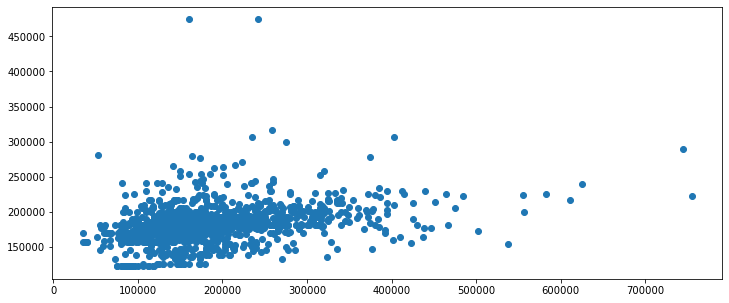

In [74]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred);

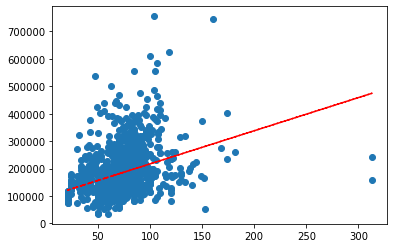

In [75]:
plt.scatter(X_lf,y)
plt.plot(X_lf,y_pred,'r--')

### TASK: add labels to these charts
search label:
https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py


### Task: try replacing scatter with plot
Do you see why scatter is needed for data rows.
Try also replacing plot with scatter. 

# Effect of using a Better predictor 
Ground Living Area should be better than Lot Frontage!

In [76]:
X_area = housing_ml[['GrLivArea']]

In [77]:
linear_model.fit(X_area, y)

LinearRegression()

Now the linear_model has another model in it

In [78]:
y_pred2 = linear_model.predict(X_area)
linear_model.score(X_area, y)

0.5021486502718042

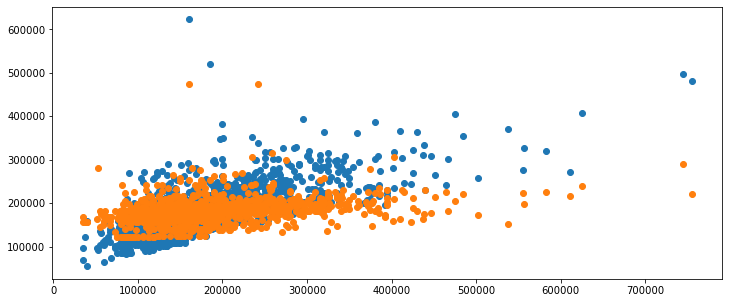

In [79]:
plt.figure(figsize=(12, 5))
plt.scatter(y, y_pred2); # blue obviously better
plt.scatter(y, y_pred); # orange

### TASK: add legend
which color is the prediction based on which feature

# Using all predictors!

In [80]:
# We had 81 columns (80 features) in original dataset,
# coded as 221 features!
X.shape

(1460, 221)

In [81]:
linear_model.fit(X, y)

LinearRegression()

In [82]:
y_pred3 = linear_model.predict(X)

In [83]:
linear_model.score(X, y)

0.9184728890914109

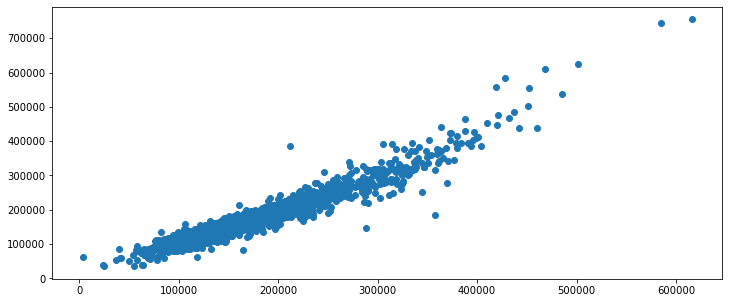

In [84]:
plt.figure(figsize=(12, 5))
plt.scatter(y_pred3, y);

# Homework 1

In [85]:
#import libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


### Each feature

In [86]:
#open lists

feature_list=[]
rmse_train_list=[]
score_train_list=[]
rmse_test_list=[]
score_test_list=[]

#loop through each feature, split the data, make a model, and evaluate them

for column in housing_ml:
    X_feature = housing_ml[[column]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, train_size=0.8, random_state=21)

    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    
    y_train_predict = lin_model.predict(X_train)
    
    rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    score_train=lin_model.score(X_train, y_train)
    
    feature_list.append(column)
    rmse_train_list.append(rmse_train)
    score_train_list.append(score_train)

    y_test_predict = lin_model.predict(X_test)
    
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    score_test=lin_model.score(X_test, y_test)
    
    rmse_test_list.append(rmse_test)
    score_test_list.append(score_test)

# put list data into a df, sort it by score, and assign top ten to new df

df = pd.DataFrame(list(zip(feature_list, rmse_train_list, score_train_list, rmse_test_list, score_test_list)),
               columns =['Feature', 'RMSE Train', 'Score Train', 'RMSE Test', 'Score Test'])
top_ten=df.sort_values(by=['Score Test'],ascending=False).head(10)    
top_ten
    

,Feature,RMSE Train,Score Train,RMSE Test,Score Test
4,OverallQual,48486.022942,0.620145,49018.435788,0.645463
36,ExterQual_Coded,57994.174558,0.456558,58260.148655,0.499175
16,GrLivArea,54623.708511,0.517889,61369.555159,0.444290
44,KitchenQual_Coded,59200.713774,0.433710,61622.301138,0.439703
12,TotalBsmtSF,62787.089059,0.363021,62430.331676,0.424913
13,1stFlrSF,63260.772572,0.353373,62876.256239,0.416668
25,GarageCars,60455.547508,0.409449,63131.022101,0.411931
26,GarageArea,61785.425838,0.383182,63377.710181,0.407326
38,BsmtQual_Coded,63797.415079,0.342356,66831.518131,0.340970
47,GarageFinish_Coded,65940.646601,0.297428,68071.654684,0.316285


### Paired features

In [87]:
#reset the index
top_ten.reset_index(inplace=True, drop=True)
#top_ten.head()


#open lists
feature_list_1=[]
feature_list_2=[]
rmse_train_list=[]
score_train_list=[]
rmse_test_list=[]
score_test_list=[]

#loop through each feature, pairing with each feature, split the data, make and evaluate models 
for value_1 in top_ten['Feature']:
    for value_2 in top_ten['Feature']:
        feature_list_1.append(value_1)
        feature_list_2.append(value_2)
        
        X_features = housing[[value_1,value_2]]
        X_train, X_test, y_train, y_test = train_test_split(X_features, y, train_size=0.8, random_state=21)
        
        lin_model = LinearRegression()
        lin_model.fit(X_train, y_train)
        
        y_train_predict = lin_model.predict(X_train)
        
        rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
        score_train=lin_model.score(X_train, y_train)
        
        rmse_train_list.append(rmse_train)
        score_train_list.append(score_train)

        y_test_predict = lin_model.predict(X_test)
        
        rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
        score_test=lin_model.score(X_test, y_test)
        
        rmse_test_list.append(rmse_test)
        score_test_list.append(score_test)

# put list data into a df, sort it by score, and assign top ten to new df

df1 = pd.DataFrame(list(zip(feature_list_1, feature_list_2, rmse_train_list, score_train_list, rmse_test_list, score_test_list)),
               columns =['Feature_1','Feature_2', 'RMSE Train', 'Score Train', 'RMSE Test', 'Score Test'])
top_ten_1=df1.sort_values(by=['Score Test'],ascending=False).head(20)    
top_ten_1



,Feature_1,Feature_2,RMSE Train,Score Train,RMSE Test,Score Test
50,1stFlrSF,OverallQual,44013.036284,0.686998,43764.688318,0.717388
5,OverallQual,1stFlrSF,44013.036284,0.686998,43764.688318,0.717388
40,TotalBsmtSF,OverallQual,45413.239141,0.666766,44577.664096,0.706791
4,OverallQual,TotalBsmtSF,45413.239141,0.666766,44577.664096,0.706791
2,OverallQual,GrLivArea,41643.733156,0.719790,45673.467009,0.692199
20,GrLivArea,OverallQual,41643.733156,0.719790,45673.467009,0.692199
70,GarageArea,OverallQual,45198.879036,0.669904,46468.134901,0.681395
7,OverallQual,GarageArea,45198.879036,0.669904,46468.134901,0.681395
30,KitchenQual_Coded,OverallQual,46529.816986,0.650178,47070.072304,0.673087
3,OverallQual,KitchenQual_Coded,46529.816986,0.650178,47070.072304,0.673087


### All features

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
score_train=lin_model.score(X_train, y_train)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_train))
print("\n")


y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
score_test=lin_model.score(X_test, y_test)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_test))

The model performance for training set
--------------------------------------
RMSE is 20999.86660191205
Score is 0.9287445945544778


The model performance for testing set
--------------------------------------
RMSE is 35623.30345000588
Score is 0.8127547098528062


### Observation:  the 2 pair prediction was, at best, 0.72, but using all features reulted in a score of 0.81.

### 5 NN

In [89]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=21)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_train_predict = knn_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
score_train=knn_model.score(X_train, y_train)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_train))
print("\n")

y_test_predict = knn_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
score_test=knn_model.score(X_test, y_test)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_test))

The model performance for training set
--------------------------------------
RMSE is 37585.14475557373
Score is 0.7717466301028698


The model performance for testing set
--------------------------------------
RMSE is 51966.07983368139
Score is 0.6015421069563245


### 10 NN

In [90]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)

y_train_predict = knn_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
score_train=knn_model.score(X_train, y_train)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_train))
print("\n")


# model evaluation for testing set
y_test_predict = knn_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
score_test=knn_model.score(X_test, y_test)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('Score is {}'.format(score_test))

The model performance for training set
--------------------------------------
RMSE is 42139.69215672655
Score is 0.7130756140255491


The model performance for testing set
--------------------------------------
RMSE is 52392.16317256475
Score is 0.5949812006956909


### Since the score is better with linear regression, it is a better tool for inference